<a href="https://colab.research.google.com/github/beanie00/2022-EE538-HW/blob/main/EE538_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# problem 1

### (1.a)
p1, p2, p3 sample들에 대한 scatter plot



- (1), (2.c), (2.d) 문제에 사용될 sample을 생성하여 S1 변수에 저장



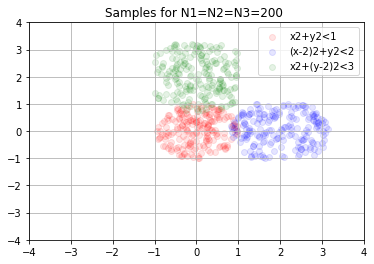

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import pandas as pd
import math

# Create sample for (1), (2.c), (2.d)

S1 = []
X_1, X_2, X_3, Y_1, Y_2, Y_3 = [[], [], [], [], [], []]
label = ['x2+y2<1','(x-2)2+y2<2', 'x2+(y-2)2<3']
fig, ax = plt.subplots()

# p1 samples
while (len(X_1) < 200):
  x1 = np.random.uniform(-1, 1)
  y1 = np.random.uniform(-1, 1)
  if (x1**2 + y1**2 < 1):
    X_1.append(x1)
    Y_1.append(y1)
    S1.append([x1, y1])

# p2 samples
while (len(X_2) < 200):
  x2 = np.random.uniform(2-math.sqrt(2), 2+math.sqrt(2))
  y2 = np.random.uniform(-1, 1)
  if ((x2-2)**2 + y2**2 < math.sqrt(2)):
    X_2.append(x2)
    Y_2.append(y2)
    S1.append([x2, y2])

# p3 samples
while (len(X_3) < 200):
  x3 = np.random.uniform(-1, 1)
  y3 = np.random.uniform(2-math.sqrt(3), 2+math.sqrt(3))
  if (x3**2 + (y3-2)**2 < math.sqrt(3)):
    X_3.append(x3)
    Y_3.append(y3)
    S1.append([x3, y3])

ax.scatter(X_1,Y_1, color='red', label=label[0], alpha=0.1)
ax.scatter(X_2,Y_2, color='blue', label=label[1], alpha=0.1)
ax.scatter(X_3,Y_3, color='green', label=label[2], alpha=0.1)
ax.legend()
ax.grid(True)
plt.title("Samples for N1=N2=N3=200 ")
plt.xlim(-4,4) 
plt.ylim(-4,4)
plt.show()

* (2.a), (2.b) 문제에 사용될 sample을 생성하여 S2 변수에 저장

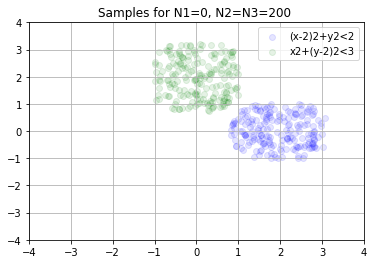

In [ ]:
# Create sample for (2.a), (2.b)
S2 = []
X_1, X_2, X_3, Y_1, Y_2, Y_3 = [[], [], [], [], [], []]
label = ['(x-2)2+y2<2', 'x2+(y-2)2<3']
fig, ax = plt.subplots()

# p2 samples
while (len(X_2) < 200):
  x2 = np.random.uniform(2-math.sqrt(2), 2+math.sqrt(2))
  y2 = np.random.uniform(-1, 1)
  if ((x2-2)**2 + y2**2 < math.sqrt(2)):
    X_2.append(x2)
    Y_2.append(y2)
    S2.append([x2, y2])

# p3 samples
while (len(X_3) < 200):
  x3 = np.random.uniform(-1, 1)
  y3 = np.random.uniform(2-math.sqrt(3), 2+math.sqrt(3))
  if (x3**2 + (y3-2)**2 < math.sqrt(3)):
    X_3.append(x3)
    Y_3.append(y3)
    S2.append([x3, y3])

ax.scatter(X_2,Y_2, color='blue', label=label[0], alpha=0.1)
ax.scatter(X_3,Y_3, color='green', label=label[1], alpha=0.1)
ax.legend()
ax.grid(True)
plt.title("Samples for N1=0, N2=N3=200 ")
plt.xlim(-4,4) 
plt.ylim(-4,4)
plt.show()

### (1.b)
Competitive learning을 이용하여 N1, N2, N3 샘플들을 3개의 cluster로 나눔

In [ ]:
def competitive_learning(dimension) :
  n_iterations = 300
  learning_rate = 0.6

  # initialize w
  w = np.random.rand(dimension, 2)

  error_list = []
  for n in range(n_iterations):
    e = 0
    if (n > 0): 
      learning_rate = 0.4 * learning_rate
    for s in S1:
      # get current cluster
      distance = []
      for i in range(dimension) : 
        distance.append(np.linalg.norm(s-w[i]))
      cur_cluster_index = np.argmin(distance, axis=0)
      # update w
      e += (s[0] - w[cur_cluster_index][0])**2 + (s[1] - w[cur_cluster_index][1])**2
      w[cur_cluster_index] = w[cur_cluster_index] + learning_rate * (s - w[cur_cluster_index])
    error_list.append(e / len(S1))

  plt.plot(range(len(error_list)), error_list)
  plt.title("Learning curve; "+str(dimension)+ ' cluster')
  plt.xlabel('$epoch$')
  plt.ylabel('$error$')
  plt.show()
  return w

In [ ]:
def plot_cluster_result(w, dimension) :
  w_x, w_y = [[], []]
  for i in range(dimension) : 
    w_x.append(w[i][0])
    w_y.append(w[i][1])
  plt.scatter(w_x,w_y, color='black', label='cluster mean', alpha=1)

  for s in S1:
      # get current cluster
      distance = []
      for i in range(dimension) : 
        distance.append(np.linalg.norm(s-w[i]))
      cur_cluster_index = np.argmin(distance, axis=0)
      if (cur_cluster_index == 0):
        plt.scatter(s[0],s[1], color='red', alpha=0.1)
      elif (cur_cluster_index == 1):
        plt.scatter(s[0],s[1], color='green', alpha=0.1)
      elif (cur_cluster_index == 2):
        plt.scatter(s[0],s[1], color='blue', alpha=0.1)
      elif (cur_cluster_index == 3):
        plt.scatter(s[0],s[1], color='yellow', alpha=0.1)

  plt.xlim(-4,4) 
  plt.ylim(-4,4)
  plt.title("Clustered results; "+str(dimension)+ ' cluster')
  plt.legend()
  plt.grid(True)

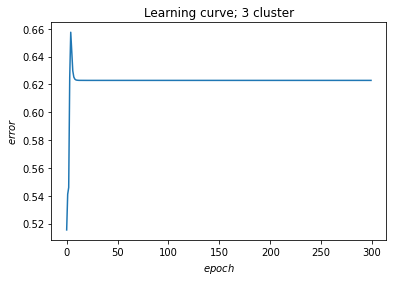

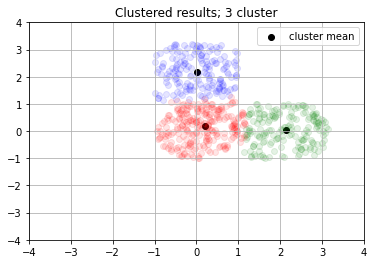

In [ ]:
w = competitive_learning(3)
plot_cluster_result(w, 3)

### (1.b)
Competitive learning을 이용하여 N1, N2, N3 샘플들을 2개의 cluster로 나눔

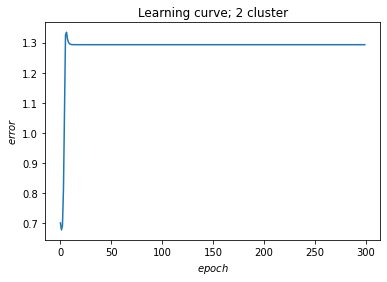

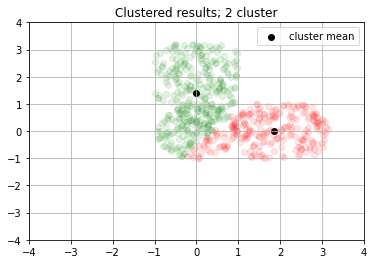

In [ ]:
w = competitive_learning(2)
plot_cluster_result(w, 2)

### (1.c)
Competitive learning을 이용하여 N1, N2, N3 샘플들을 4개의 cluster로 나눔

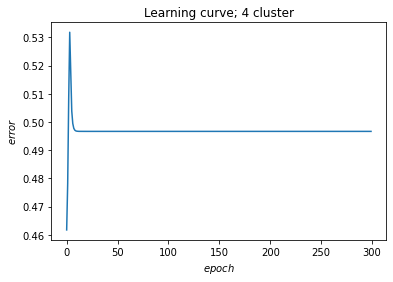

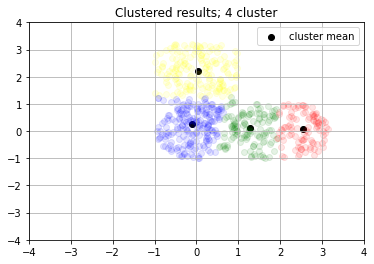

In [ ]:
w = competitive_learning(4)
plot_cluster_result(w, 4)

# problem 2

### (2.a)

PCA를 eigen-decomposition 방법과 Scikit-learn의 내장 라이브러리를 이용하여 각각 계산



#### eigen-decomposition을 이용한 PCA 구하기



*  구해진 PCA를 plot하기 위한 함수



In [ ]:
def plot_pca(type, method, eigen_vec):
  if (type == 1):
    S = S1
  else:
    S = S2
  V = np.array(eigen_vec)
  origin = np.array([[0, 0],[0, 0]])

  plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=5)
  
  for s in S:
    plt.scatter(s[0],s[1], color='black', alpha=0.1)

  if (type == 1):
    plt.title("["+method+"] Principal component; N1=N2=N3=200")
  else:
    plt.title("["+method+"] Principal component; N1=0, N2=N3=200")
    
  print("\n")
  plt.show()
  print("\n\n")



*  Eigen value decomposition을 이용한 PCA 계산



***Using eigen vector decomposition***

eigenvalue : [1.74140334 0.26360919]
eigenvector :
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
explained variance ratio :
 [0.86852492 0.13147508]




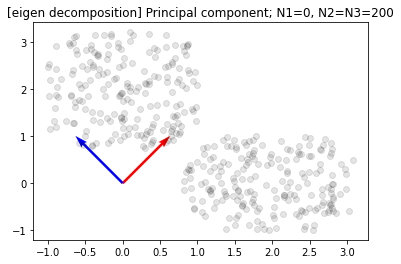

In [ ]:
def eigen_decomposition(type):
  if (type == 1):
    S = S1
  else:
    S = S2
  X = np.array(S)
  # Normalizing X
  norm_X = X-X.mean(axis=0)
  norm_X = norm_X/X.std(axis=0)

  # Covariance Matrix
  cov_norm_X = np.cov(norm_X.T)

  # Correlation Matrix
  corr_norm_X = np.corrcoef(norm_X.T)

  # Eigendecomposition
  eigen_val, eigen_vec = np.linalg.eig(cov_norm_X)

  print("***Using eigen vector decomposition***\n")
  print('eigenvalue :', eigen_val)
  print('eigenvector :\n', eigen_vec)
  print('explained variance ratio :\n', eigen_val / eigen_val.sum())

  plot_pca(type, "eigen decomposition", eigen_vec)

eigen_decomposition(S2)



#### Scikit-Learn을 이용한 PCA 구하기



***Using Scikit learn library***

singular value : [29.76305733 11.56847083]
singular vector :
 [[-0.6885053 -0.7252313]
 [ 0.7252313 -0.6885053]]
eigen_value : [2.22014933 0.33541232]
explained variance ratio :
 [0.86875201 0.13124799]




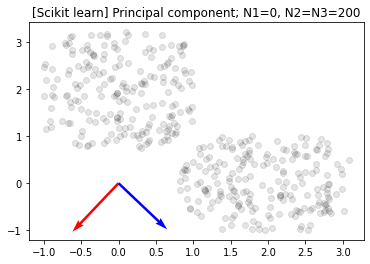

In [ ]:
def sciket_PCA(type):
  if (type == 1):
    S = S1
  else:
    S = S2
  pca = PCA(n_components=2)
  pca.fit_transform(S)
  print("***Using Scikit learn library***\n")
  print('singular value :', pca.singular_values_)
  print('singular vector :\n', pca.components_.T)
  print('eigen_value :', pca.explained_variance_)
  print('explained variance ratio :\n', pca.explained_variance_ratio_)

  plot_pca(type, "Scikit learn", pca.components_.T)

sciket_PCA(2)

### (2.b)
Lecture note 2의 PCA 알고리즘은 nomalization 문제가 존재 (즉, w값이 발산)

따라서 w 벡터의 크기를 1로 고정하거나, oja rule을 사용하여 nomalization을 방지하는 방향으로 풀이를 진행

*  구해진 PCA를 plot하기 위한 함수


In [ ]:
def plot_first_pca(type, method, W):
  if (type == 1):
    S = S1
  else:
    S = S2

  plt.quiver(0, 0, W[0][0], W[1][0], color=['r'], scale=5)
  for s in S:
    plt.scatter(s[0],s[1], color='black', alpha=0.1)

  if (type == 1):
    plt.title("["+method+"] Principal component; N1=N2=N3=200")
  else:
    plt.title("["+method+"] Principal component; N1=0, N2=N3=200")

  print("\n")
  plt.show()
  print("\n\n")



*  hebbian learning, Oja's rule 구현


In [ ]:
def pca_hebbian_learning(type):
  if (type == 1):
    S = S1
  else:
    S = S2
  X = np.array(S)

  # Normalizing X
  norm_X = X-X.mean(axis=0)
  norm_X = norm_X/X.std(axis=0)

  W = np.random.normal(scale=0.25, size=(2, 1))
  prev_W = np.ones((2, 1))

  learning_rate = 0.0001
  tolerance = 1e-8

  while np.linalg.norm(prev_W - W) > tolerance:
      prev_W = W.copy()
      
      Ys = np.dot(norm_X, W)
      W += learning_rate * np.sum(Ys*norm_X, axis=0).reshape((2, 1))
      # Normalizing W
      W = W / math.sqrt(W[0]**2 + W[1]**2)

  print("***Using hebbian learning***\n")
  print('eigenvector :\n', [W[0][0], W[1][0]])
  plot_first_pca(type, "hebbian learning", W)

def pca_oja(type):
  if (type == 1):
    S = S1
  else:
    S = S2
  X = np.array(S)

  # Normalizing X
  norm_X = X-X.mean(axis=0)
  norm_X = norm_X/X.std(axis=0)

  # Apply the Oja's rule
  W_oja = np.random.normal(scale=0.25, size=(2, 1))
  prev_W_oja = np.ones((2, 1))

  learning_rate = 0.0001
  tolerance = 1e-8

  while np.linalg.norm(prev_W_oja - W_oja) > tolerance:
      prev_W_oja = W_oja.copy()
      
      Ys = np.dot(norm_X, W_oja)
      W_oja += learning_rate * np.sum(Ys*norm_X - np.square(Ys)*W_oja.T, axis=0).reshape((2, 1))

  print("***Using Oja's rule***\n")
  print('eigenvector :\n', [W_oja[0][0], W_oja[1][0]])
  plot_first_pca(type, "Oja's rule", W_oja)

***Using hebbian learning***

eigenvector :
 [0.7071066643994306, -0.7071068979736452]




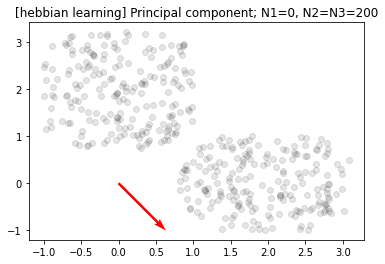




***Using Oja's rule***

eigenvector :
 [0.7071068924051347, -0.7071066699679446]




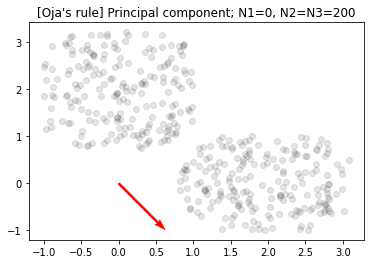

In [ ]:
pca_hebbian_learning(2)
pca_oja(2)

### (2.c)

(2.a) 과정을 N1=N2=N3=200 일 때 반복

***Using eigen vector decomposition***

eigenvalue : [0.65459228 1.34874662]
eigenvector :
 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
explained variance ratio :
 [0.32675064 0.67324936]




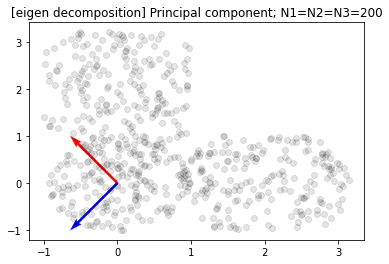




***Using Scikit learn library***

singular value : [30.90817135 21.5241067 ]
singular vector :
 [[ 0.69019028 -0.72362793]
 [-0.72362793 -0.69019028]]
eigen_value : [1.59484984 0.77343434]
explained variance ratio :
 [0.67341996 0.32658004]




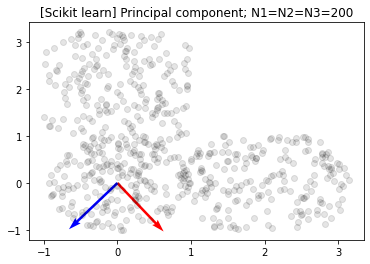

In [ ]:
eigen_decomposition(1)
sciket_PCA(1)

### (2.d)

(2.b) 과정을 N1=N2=N3=200 일 때 반복

***Using hebbian learning***

eigenvector :
 [0.7071066105972961, -0.7071069517757579]




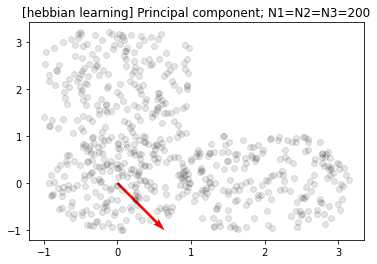




***Using Oja's rule***

eigenvector :
 [-0.7071066217273916, 0.7071069406456684]




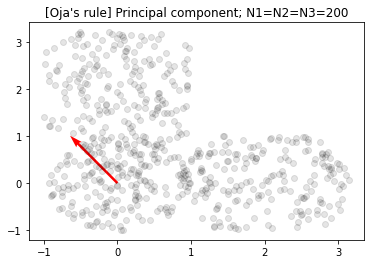

In [ ]:
pca_hebbian_learning(1)
pca_oja(1)